# Main Components

1. **LLMs** based on the **Transformer Architecture**
2. **RAG** (Retrieval Augmented Generation) architecture that pairs generalised LLMs with domain-specific data sets in **Vector Databases**
3. **Multi-Agent Systems** combine multiple LLM agents, Vector Database sources and Function Execution to perform complex tasks
4. **Open Models** based on either open, free to use weights (i.e Llama from Meta) or open source (i.e. Mixtral from Mistral). These can be fine tuned and allow proprietary low-cost model serving solutions to be developed.

# LLMs (Large Language Models)

## What's LLMs?

LLMs are advanced AI systems designed to understand and generate text that sounds like it was written by a human. These models use large amounts of data and complex neural networks, like transformers, to perform many language-related tasks.

<img src='https://sciforce.solutions/strapi/uploads/02_guide_773e2d4361.jpg' width='500'>

**Autoregressive LLMs**
- generate text by predicting the next word based on the previous words in a sentence.
- for tasks:
    - Chatbots and Virtual Assistants
    - Content Creation Tools
    - Predictive Text and Autocomplete
    - Language Translation Services
    - Interactive Storytelling

**Autoencoding LLMs**
- focus on learning the structure and meaning of a text.
- compress the input text into a simpler, lower-dimensional representation (encoding)
- then reconstruct it back to the original form (decoding)
- for tasks:
    - Text Classification
    - Sentiment Analysis
    - Information Retrieval
    - Anomaly Detection
    - Text Summarization
    - Semantic Search

**Hybrid LLM**
- leverage the strengths of both autoregressive and autoencoding models.
- generate text while also deeply understanding the context.
- for tasks:
    - Conversational Agents
    - Advanced Content Creation
    - Comprehensive Text Analysis
    - Interactive Storytelling
    - Intelligent Search Engines
    - Personalized Recommendations
    - Language Translation

## Building a Private LLM

### Data Curation

The datasets used typically range from hundreds of terabytes to multiple petabytes.

<img src='https://sciforce.solutions/strapi/uploads/03_guide_b1a09510db.jpg' width='400'>

- **Web Data**: FineWeb (not fully deduplicated for better performance, entirely English), Common Crawl (55% non-English)

- **Code**: Publicly Available Code from all the major code hosting platforms

- **Academic Texts**: Anna’s Archive, Google Scholar, Google Patents

- **Books**: Google Books, Anna’s Archive

- **Court Documents**: RECAP archive (USA), Open Legal Data (Germany)

### Data Preprocessing

**Tokenization**

is the process of breaking down text into tokens: words, subwords, or characters.

<img src='https://sciforce.solutions/strapi/uploads/04_llm_aea9a8fcc4.jpg' width='400'>

Help model:
- handle various text lengths.
- easily manage a set of words or subwords.
- understand the context of each token within a sentence.
- improve the accuracy of tasks like translation or text generation.

**Embedding**

turn each text into a unique set of numbers called a vector that captures its meaning so a computer can understand it. e.g.

<img src='https://sciforce.solutions/strapi/uploads/05_guide_0369548893.jpg' width='400'>

**Attention**
Helps the model understand which words matter most to get the meaning right.

<img src='https://sciforce.solutions/strapi/uploads/06_guide_cfc59c7660.jpg' width='400'>

- The green attention reflects positive feedback.
- The red attention reflects negative feedback.

### LLM Training

**Data Input and Preparation**

1. **Data Ingestion**: Collect and load data from various sources.
2. **Data Cleaning:** Remove noise, handle missing data, and redact sensitive information.
3. **Normalization**: Standardize text, handle categorical data, and ensure data consistency.
4. **Chunking**: Split large texts into manageable chunks while preserving context.
5. **Tokenization**: Convert text chunks into tokens for model processing.
6. **Data Loading**: Efficiently load and shuffle data into batches for optimized training, using parallel loading when necessary.

**Hyperparameter Tuning**

Tuning **key hyperparameters** is essential to ensure the training loop converges effectively, leading to better model performance and efficiency.
- **Learning Rate**: Determines the size of weight updates during training.

<img src='https://sciforce.solutions/strapi/uploads/07_guide_5e1f6d07c5.jpg' width='500'>

- **Batch Size**: the number of samples processed in each iteration. 
    - Larger batches stabilize training but require more memory.
    - smaller batches introduce variability but are less resource-intensive.

**Parallelization and Resource Management**

LLMs grow in size, so parallelization and resource management techniques become essential for speeding up processing and enabling efficient handling of large data.
- **Data Parallelization** splits datasets across multiple GPUs during forward propagation.
- **Model Parallelization** divides itself across GPUs, ensuring that all model components are utilized without memory issues.
- **Gradient Checkpointing** reduces memory usage during forward propagation, enabling more efficient backward propagation by selectively storing intermediate results.

**Iteration and Epochs** (through each data batch):
1. Do prediction (forward propagation).
2. Calculate training loss.
3. Calcualte loss gradient (backward propagation).
4. update the model weights.
5. Calculate validation loss.

Through repeated iterations and multiple epochs:
- the model’s parameters are fine-tuned, leading to increasingly accurate and robust.
- prevent issues such as overfitting or underfitting.

### Evaluating LLMs

**Technical Evaluation** throught benchmarks:
- **MMLU (Massive Multitask Language Understanding)**:
    - measures the model’s natural language understanding across a broad range of subjects
    - is used to assess the general linguistic and reasoning capabilities of LLMs.

- **GPQA (General Purpose Question Answering)**:
    - evaluate the ability to handle diverse and complex question-answering tasks.
    - tests the proficiency in providing accurate, contextually relevant answers across various domains.

- **MATH**:
    - test the mathematical reasoning skills.
    - involves solving multi-step problems that require both calculation and logical reasoning.

- **HumanEval**:
    - Assesses the capability in generating functional and correct code.

- **Arena** (advanced benchmarks and platforms):
    - pose questions to two anonymous LLMs and determine which one answers better (LLMs ranking).
    - provides a more dynamic, user-driven evaluation.

`Note`: 
- Fine-tuning typically involves adapting the model to specific prompts and contexts.
- metric should reflect the business objectives.

**Conversational Performance Evaluation**

The engagement, coherence, and context awareness metric measure how effectively the model engages with users and maintains conversation quality.

<img src='https://sciforce.solutions/strapi/uploads/08_guide_f1eb9f3dc9.jpg' width='500'>

**Continuous Monitoring**
- ensure that the model maintains its performance over time, especially as new data becomes available or as the model is deployed in different contexts.
- As new data is introduced, periodically retrain and fine-tune the model to keep it accurate and relevant.

# RAG (Retrieval Augmented Generation)

RAG adds extra contextual data into promt

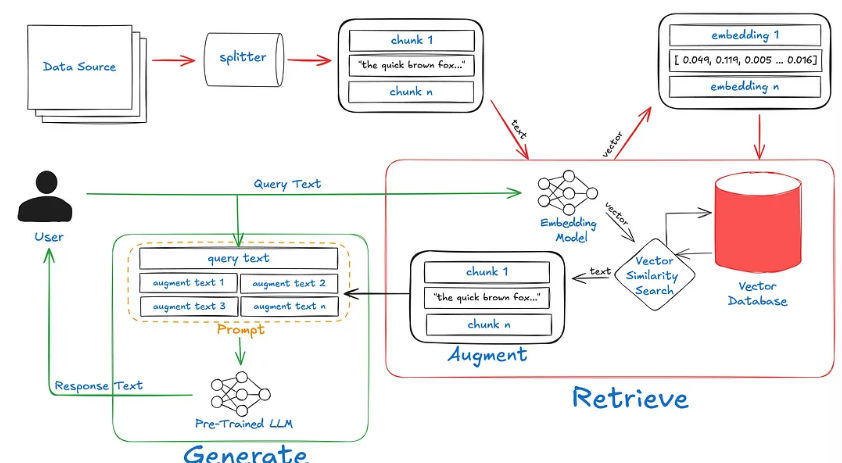

**Explaination**:
- The red arrow path:
    - split documents in data source into small chunks.
    - pass chunks through an embedding model to get embedded chunks.
    - store the embedded chunks into vector DB.
- The remaining path:
    - pass user's query through the embedding model to get embedded query.
    - calculate the similarity score between the embedded query and each embedded chunk.
    - combine the chunk with the highest score and the query to get prompt.
    - pass the prompt into a LLM model to get the final response.

# Multi Agent Systems

Multi-agent systems are where multiple smaller models collaborate to achieve goals that are unattainable by single models alone.

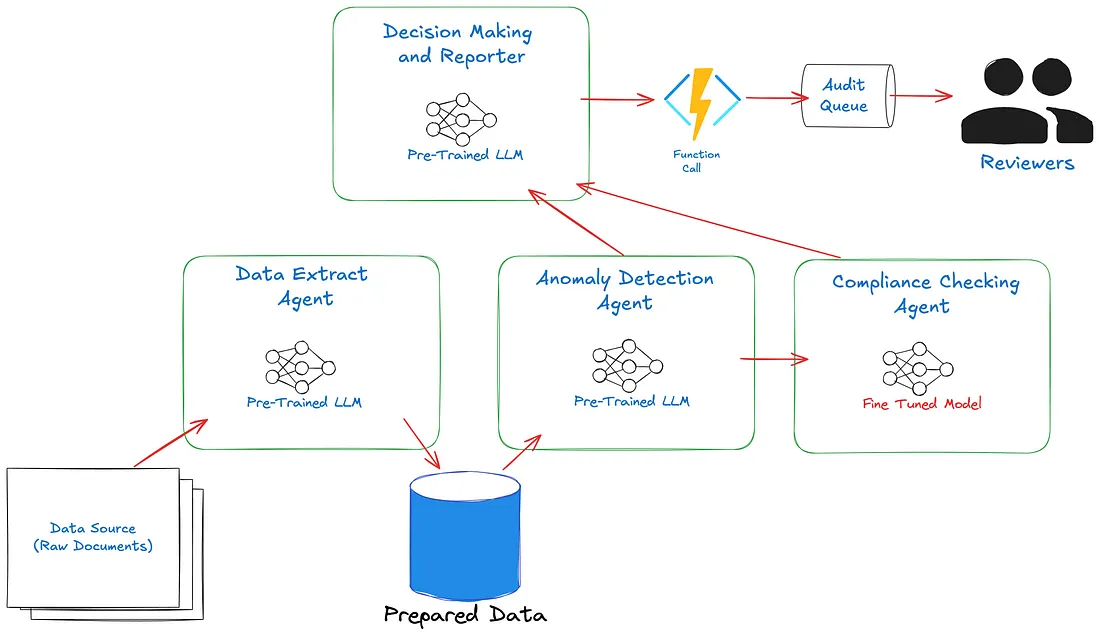

This structure enables aspects:

- Guardrails to check output quality — techniques such as LLM-as-a-judge can check for signs of hallucination or inappropriate responses.
- Enable automation process flows by calling functions.
- Include a human-in-the-loop to provide feedback on the responses being provided and to make an expert assessment of automated content.

# Inference

[LLMs— From Research to Reality](https://medium.com/@ed.bullen/llms-from-research-to-reality-57d5936552c1)

[Step-by-Step Guide to Creating Your Own Large Language Model](https://sciforce.solutions/blog/stepbystep-guide-to-creating-your-own-large-language-model-208)